<a href="https://colab.research.google.com/github/AsiaZendarska/data-science-bootcamp/blob/main/KursUdemyDataScience_UczenieMaszynowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UCZENIE MASZYNOWE - SCIKIT-LEARN

Biblioteka do uczenia mszynowego (machine learning), analizy danych, eksploracji danych, nauki danych.

Strona biblioteki: https://scikit-learn.org

Dokumentacja/User Guide: https://scikit-learn.org/stable/user_guide.html

pip install scikit-learn
pip install -q --upgrade scikit-learn


Główne kategorie uczenia maszynowego:

Uczenie Nadzorowane:
klasyfikacja
regresja

Uczenie Nienadzorowane:
klasteryzacja
redukcja wymiarowości

In [3]:
import sklearn
sklearn.__version__

'1.2.2'

# KLASYFIKACJA

In [2]:
import numpy as np
from sklearn import datasets

np.random.seed(10)
raw_data = datasets.load_iris()
raw_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
raw_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(raw_data.DESCR) # opis całego data setu

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
# pobieramy dane które beda nam potrzębne
data = raw_data.data
target = raw_data.target

In [7]:
print(data.shape)
print(target.shape) # wymiaru muszą się zgadzać

(150, 4)
(150,)


## Logistic regression

In [10]:
# dzielimy nasze dane na zbiory treningowe i testowe, na ternigowym uczymy nasz zbiór a na testowym sprawdzamy czy dobrze działa
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.3)

In [11]:
print(data_train.shape)
print(data_test.shape)
print(target_train.shape)
print(target_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [17]:
from sklearn.linear_model import LogisticRegression # model klasyfikacji

# tworzymy instancje tej klasy
model = LogisticRegression()
model.fit(data_train, target_train) # trenujemy model na danych treningiwych

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
# Używamy metody predict do przewidzenia wartości naszego modelu testowegoY
target_pred = model.predict(data_test) # przekazujemy tylko cechy
target_pred

array([1, 2, 1, 0, 1, 2, 1, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 0, 1, 0, 1, 1, 2, 1, 0, 1, 2, 2, 2, 1, 0, 1, 1, 2, 2, 2, 0, 0,
       1])

In [21]:
# Ocena naszego modelu
from sklearn.metrics import confusion_matrix

confusion_matrix(target_test, target_pred)

array([[10,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 17]])

In [22]:
# Raport oceny naszego modelu
from sklearn.metrics import classification_report

print(classification_report(target_test, target_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.94      0.97        18
           2       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## Metryki - Kasyfikacja binarna

In [14]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

### Accuracy - dokładność klasyfikacji

In [44]:
y_true = np.array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1])
y_pred = np.array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [45]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true, y_pred)

0.8

In [46]:
results = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
results

,y_true,y_pred
0,1,0
1,0,0
2,1,1
3,1,1
4,0,0
5,1,1
6,1,0
7,0,0
8,1,1
9,0,1


In [47]:
# prosta wizualizacja tych predykcji
results = results.sort_values(by='y_true')
results = results.reset_index(drop=True)
results['sample'] = results.index + 1
results

,y_true,y_pred,sample
0,0,0,1
1,0,0,2
2,0,0,3
3,0,0,4
4,0,0,5
5,0,0,6
6,0,0,7
7,0,0,8
8,0,1,9
9,0,1,10


In [48]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=results['sample'], y=results['y_true'], mode='markers', name='y_true'), row=1, col=1)
fig.add_trace(go.Scatter(x=results['sample'], y=results['y_pred'], mode='markers', name='y_pred'), row=2, col=1)
fig.update_layout(width=900, height=500, title='Klasyfikator binarny')
fig.show()

### Macierz konfuzji/pomyłek

In [49]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)

array([[ 8,  2],
       [ 4, 16]])

In [51]:
import plotly.figure_factory as ff
cm = [[8,2], [4,16]]
def plot_confusion_matrix(cm):
  cm = cm[::-1]
  cm = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_1', 'true_0'])

  fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index),
                                      colorscale='ice', showscale=True, reversescale=True)
  fig.update_layout(width=400, height=400, title='Confusion Matrix', font_size=16)
  fig.show()

plot_confusion_matrix(cm)

In [31]:
cm = np.array([[8,  2], [ 4, 16]])
tn, fp, fn, tp = cm.ravel()
print(f'TN - True Negative: {tn}')
print(f'FP - False Positive: {fp}')
print(f'FN - False Negative: {fn}')
print(f'TP - True Positive: {tp}')

TN - True Negative: 8
FP - False Positive: 2
FN - False Negative: 4
TP - True Positive: 16


In [32]:
# Type I error - False Positive Rate
fpr = fp / (fp + tn)
fpr

0.2

In [33]:
# Type II error - False Negative Rate
fnr = fn / (fn + tp)
fnr

0.2

In [34]:
# Precision - ile obserwacji przewidywanych jako pozytywne są w rzeczywistości pozytywne
precision = tp / (tp + fp)
print(precision)

0.8888888888888888


In [35]:
# Recall - jak wiele obserwacji z wzystkich poytywnych sklasyfikowaliśmy jako pozytywne
recall = tp / (tp + fn)
print(recall)

0.8


### Krzywa ROC

In [37]:
from sklearn.metrics import roc_curve

fpr, tpr, thresh = roc_curve(y_true, y_pred, pos_label=1)
roc = pd.DataFrame({'fpr': fpr, 'tpr': tpr})
roc

,fpr,tpr
0,0.0,0.0
1,0.2,0.8
2,1.0,1.0


In [38]:
def plot_roc_curve(y_true, y_pred):
    # Binary classification
    from sklearn.metrics import roc_curve
    fpr, tpr, tresh = roc_curve(y_true, y_pred, pos_label=1)

    fig = go.Figure(data=[go.Scatter(x=roc['fpr'], y=roc['tpr'], line_color='red', name='ROC Curve'),
                        go.Scatter(x=[0, 1], y=[0, 1], mode='lines', line_dash='dash', line_color='navy')],
                    layout=go.Layout(xaxis_title='False Positive Rate',
                                    yaxis_title='True Positive Rate',
                                    title='ROC Curve',
                                    showlegend=False,
                                    width=800,
                                    height=400))
    fig.show()
plot_roc_curve(y_true, y_pred)

## Metryki - Klasyfikacja Wieloklasowa

### Accuracy - dokładność klasyfikacji

In [52]:
y_true = np.array([1, 0, 1, 2, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2])
y_pred = np.array([0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 1, 1, 1, 2, 2])

accuracy_score(y_true, y_pred)

0.7241379310344828

### Macierz konfuzji/pomyłek

In [53]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[ 6,  1,  0],
       [ 3, 10,  2],
       [ 0,  2,  5]])

In [54]:
def plot_confusion_matrix(cm):
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=['pred_0', 'pred_1', 'pred_2'], index=['true_2','true_1', 'true_0'])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index),
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=400, height=400, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

### Raport klasyfikacji

In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       0.77      0.67      0.71        15
           2       0.71      0.71      0.71         7

    accuracy                           0.72        29
   macro avg       0.72      0.75      0.73        29
weighted avg       0.73      0.72      0.72        29



In [56]:
print(classification_report(y_true, y_pred, target_names=['label_1', 'label_2', 'label_3']))

              precision    recall  f1-score   support

     label_1       0.67      0.86      0.75         7
     label_2       0.77      0.67      0.71        15
     label_3       0.71      0.71      0.71         7

    accuracy                           0.72        29
   macro avg       0.72      0.75      0.73        29
weighted avg       0.73      0.72      0.72        29



# METRYKI - PROBLEM REGRESJI, METODY OCENY MODELU

## Import bibliotek

In [57]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

## Interpretacja graficzna

In [58]:
y_true = 100 + 20 * np.random.randn(50)
y_true

array([ 72.73950529,  78.0351334 ,  98.01903094,  70.89602811,
        79.00651506, 111.80379593,  98.33696542, 118.00906429,
       136.3065435 ,  95.51210029, 128.97842221,  87.83000115,
       103.74582233,  94.89947538,  89.62499451, 131.92289493,
        69.938297  , 103.81216128,  81.87082473,  41.26691676,
       105.86028764, 124.85976461, 103.55678521, 115.46790694,
       110.77666709, 127.50528183,  82.99906634, 138.67739482,
        98.63670049,  97.64440305,  82.93588029, 124.19759853,
       124.51040777, 128.51109883, 120.75475949, 111.11577249,
        91.97229001, 130.62510919,  86.69699441, 106.82430759,
       112.65358515, 108.94453123, 100.34420029, 106.50364405,
       113.60854725, 144.44712029, 120.87420944,  78.87636668,
        74.88084348, 126.01053781])

In [59]:
y_pred = y_true + 10 * np.random.randn(50)
y_pred

array([ 61.49002508,  66.94941924,  85.15480107,  87.2721188 ,
        91.6525643 , 118.05357694,  86.93847105, 118.8805029 ,
       125.99734766, 114.99245754, 132.37969421,  99.19493335,
       104.5767609 ,  87.98209721,  77.23591938, 145.51243407,
        52.02991669,  90.15931529,  49.92857159,  51.10208036,
       115.61037755, 111.53149274,  92.66840112, 115.88634778,
       101.84280629, 121.01047785,  74.40364634, 134.15461235,
       103.15254961, 100.18145603,  79.04823963, 108.26617342,
       151.75970858, 111.65220597, 145.15936875, 112.94057876,
        87.43143648, 127.52202675,  81.34821205, 115.78312842,
       110.96622936, 121.61936119,  98.20990501, 101.69944179,
       117.31571228, 135.16692038, 110.81971529,  74.67802456,
        67.80480644, 114.34850552])

In [60]:
# tworzymy ramke danych
results = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
results

,y_true,y_pred
0,72.739505,61.490025
1,78.035133,66.949419
2,98.019031,85.154801
3,70.896028,87.272119
4,79.006515,91.652564
5,111.803796,118.053577
6,98.336965,86.938471
7,118.009064,118.880503
8,136.306543,125.997348
9,95.512100,114.992458


In [62]:
# przewidujemy błąd
results['error'] = results['y_true'] - results['y_pred']
results.head()

,y_true,y_pred,error
0,72.739505,61.490025,11.249480
1,78.035133,66.949419,11.085714
2,98.019031,85.154801,12.864230
3,70.896028,87.272119,-16.376091
4,79.006515,91.652564,-12.646049


In [63]:
def plot_regression_results(y_true, y_pred):
    results = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
    min = results[['y_true', 'y_pred']].min().min()
    max = results[['y_true', 'y_pred']].max().max()

    fig = go.Figure(data=[go.Scatter(x=results['y_true'], y=results['y_pred'], mode='markers'),
                    go.Scatter(x=[min, max], y=[min, max])],
                    layout=go.Layout(showlegend=False, width=800, height=500,
                                     xaxis_title='y_true',
                                     yaxis_title='y_pred',
                                     title='Regression results'))
    fig.show()
plot_regression_results(y_true, y_pred)

In [64]:
y_true = 100 + 20 * np.random.randn(1000)
y_pred = y_true + 10 * np.random.randn(1000)
results = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
results['error'] = results['y_true'] - results['y_pred']

px.histogram(results, x='error', nbins=50, width=800)

## Mean Absolute Error - MAE - Średni błąd bezwzględny

In [65]:
def mean_absolute_error(y_true, y_pred):
    return abs(y_true - y_pred).sum() / len(y_true)

mean_absolute_error(y_true, y_pred)

7.9903916275850335

In [69]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true, y_pred)

7.9903916275850335

## Mean Squared Error - MAE - Średni błąd bezwzględny


In [71]:
def mean_squared_error(y_true, y_pred):
    return ((y_true - y_pred) ** 2).sum() / len(y_true)

mean_squared_error(y_true, y_pred)

99.81236011108861

In [72]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_true, y_pred)

99.81236011108861

## Root Mean Squared Error - RMSE - Pierwiastek błędu średniokwadratowego

Mówi nam jak średnio nasze predykcje odbiegaja od wartości prawdzuiwych

In [75]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(((y_true - y_pred) ** 2).sum() / len(y_true))

root_mean_squared_error(y_true, y_pred)

9.990613600329493

In [76]:
np.sqrt(mean_squared_error(y_true, y_pred))

9.990613600329493

## Max Error - Błąd maksymalny

Opisuje najgorszy przypade w którym nasz model się myli

In [77]:
def max_error(y_true, y_pred):
    return abs(y_true - y_pred).max()

In [78]:
max_error(y_true, y_pred)

32.05261310408932

In [79]:
from sklearn.metrics import max_error

max_error(y_true, y_pred)

32.05261310408932

## R2 score - współczynnik determinacji

Cc=hcemy aby ta metryka była jak najbliżej 1, służy do ewaluacji naszych modeli


In [80]:
def r2_score(y_true, y_pred):
    numerator = ((y_true - y_pred) ** 2).sum()
    denominator = ((y_true - y_true.mean()) ** 2).sum()
    try:
        r2 = 1 - numerator / denominator
    except ZeroDivisionError:
        print('Dzielenie przez zero')
    return r2

In [81]:
r2_score(y_true, y_pred)

0.7475864806383159

In [82]:
from sklearn.metrics import r2_score

r2_score(y_true, y_pred)

0.7475864806383159

# REGRRESJA LINIOWA

## Regresja liniowa - wprowadzenie

In [2]:
import sklearn
import numpy as np

## Wygenerowanie danych

In [6]:
X = np.arange(0, 50, 0.5)
noise = 10 * np.random.randn(100)
y = 2 * X + 100 + noise
X = X.reshape(-1, 1)

print('Rozmiar X:', X.shape)
print('Rozmiar y:', y.shape)

Rozmiar X: (100, 1)
Rozmiar y: (100,)


## Podział danych na zbiór treningowy i testowy

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # stratify= ustawiamy kiedy chcemy miec równy podział kasy

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train_shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape: (75, 1)
X_test shape: (25, 1)
y_train_shape (75,)
y_test shape (25,)


## Wizualizacja

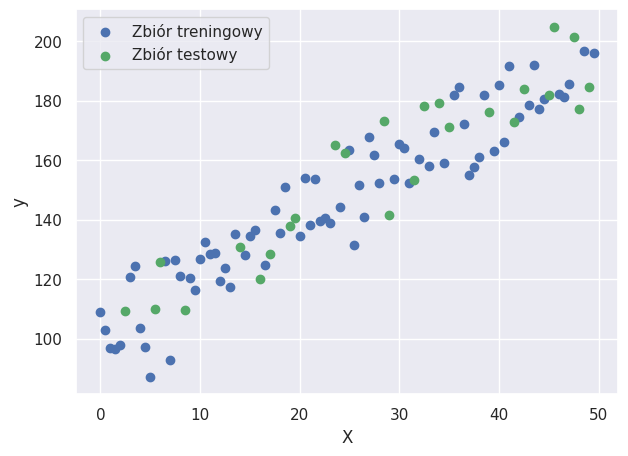

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(7, 5))
plt.scatter(X_train, y_train, c='b', label='Zbiór treningowy')
plt.scatter(X_test, y_test, c='g', label='Zbiór testowy')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## Trenowanie modelu regresji liniowej

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print(lin_reg.coef_) # wartośći naszych wag
print(lin_reg.intercept_) # wartość wyrazu wolnego, przecięcia z osią y

[1.82994893]
102.74371265204375


## Wizualizacja zbioru treningowego i dopasowanego modelu

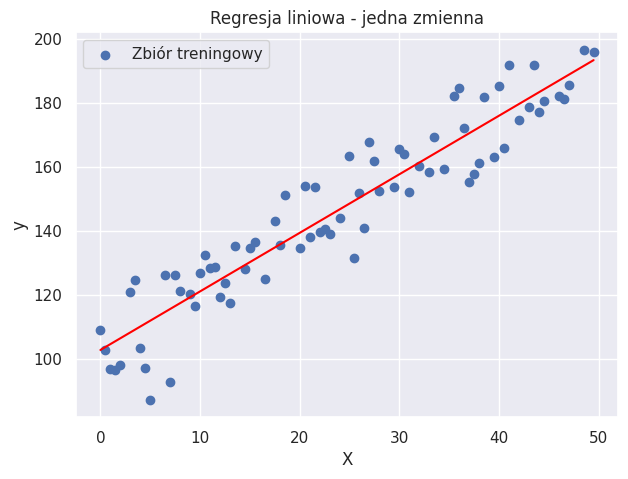

In [12]:
plt.figure(figsize=(7,5))
plt.title('Regresja liniowa - jedna zmienna')
plt.scatter(X_train, y_train, c='b', label='Zbiór treningowy')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0] * X, c='red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

## Wizualizacja zbioru testowego i dopasowanego modelu

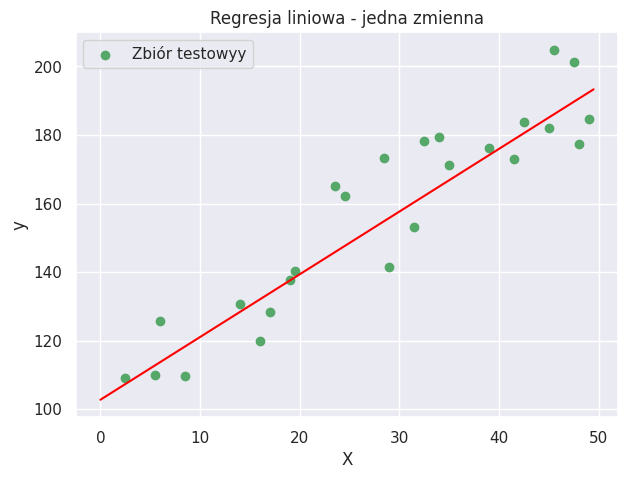

In [14]:
y_pred = lin_reg.predict(X_test)
plt.figure(figsize=(7,5))
plt.title('Regresja liniowa - jedna zmienna')
plt.scatter(X_test, y_test, c='g', label='Zbiór testowyy')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0] * X, c='red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

## Ocena modelu - Metoda score()

 Metoda score() zwraca współczynnik determinacji R2 naszej predykcji. Współczynnik ten jest miarą stopnia dopasowania modelu do próby, Dopasowanie modelu jest tym lepsze im wartość R2 jest bliżej 1

In [16]:
lin_reg.score(X_test, y_test)

0.8592360739835041

In [19]:
# zeby sprawdzić jak jakaś funkcja działa
lin_reg.score?

## Przykład złego zastosowania regresji liniowej

[-0.69069725]
15.438478061715402


Text(0, 0.5, 'y')

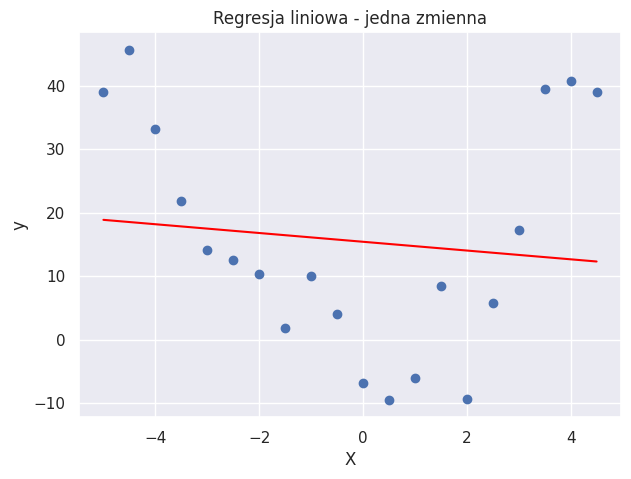

In [22]:
X = np.arange(-5,5,0.5)
noise = 10 * np.random.randn(20)
y = 2 * (X ** 2) + 4 + noise
X = X.reshape(-1,1)

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(lin_reg.coef_)
print(lin_reg.intercept_)

plt.figure(figsize=(7,5))
plt.title('Regresja liniowa - jedna zmienna')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0] * X, c='red')
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')

# POLYNOMIAL REGRESION - REGRESJA WIELOMIANOWA

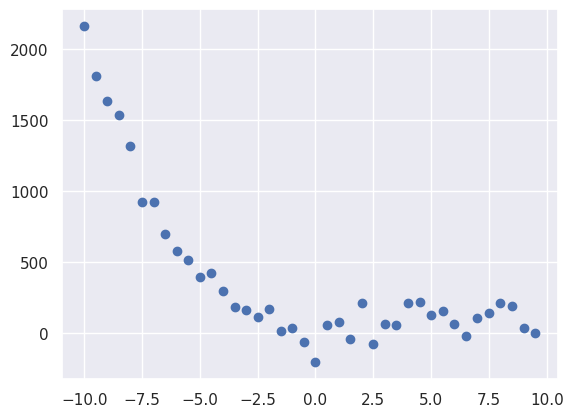

In [23]:
np.random.seed(0)
X = np.arange(-10, 10, 0.5)
noise = 80 * np.random.randn(40)
y = -X**3 + 10*X**2 - 2*X + noise
X = X.reshape(40, 1)
_ = plt.scatter(X, y)

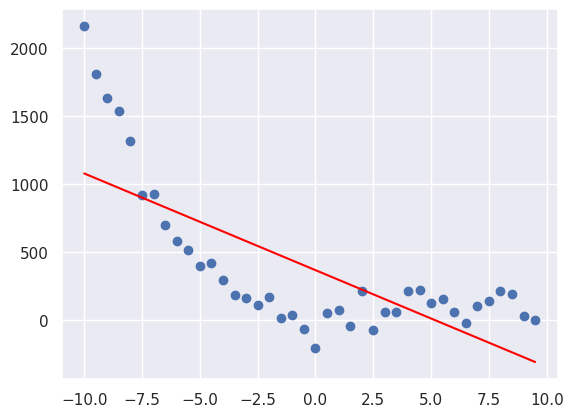

In [24]:
regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)

plt.scatter(X, y)
_ = plt.plot(X, y_pred, c='red')

In [27]:
from sklearn.metrics import r2_score

r2_score(y, y_pred)

0.5398062344255777

Widać że model jest niedouczony - underfitting. Potrzebujemy zwiększyć złożonośc modelu do naszego problemu

## Ekstrakcja cech wielomianowych - stopień 2

In [31]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_poly

array([[  1.  , -10.  , 100.  ],
       [  1.  ,  -9.5 ,  90.25],
       [  1.  ,  -9.  ,  81.  ],
       [  1.  ,  -8.5 ,  72.25],
       [  1.  ,  -8.  ,  64.  ],
       [  1.  ,  -7.5 ,  56.25],
       [  1.  ,  -7.  ,  49.  ],
       [  1.  ,  -6.5 ,  42.25],
       [  1.  ,  -6.  ,  36.  ],
       [  1.  ,  -5.5 ,  30.25],
       [  1.  ,  -5.  ,  25.  ],
       [  1.  ,  -4.5 ,  20.25],
       [  1.  ,  -4.  ,  16.  ],
       [  1.  ,  -3.5 ,  12.25],
       [  1.  ,  -3.  ,   9.  ],
       [  1.  ,  -2.5 ,   6.25],
       [  1.  ,  -2.  ,   4.  ],
       [  1.  ,  -1.5 ,   2.25],
       [  1.  ,  -1.  ,   1.  ],
       [  1.  ,  -0.5 ,   0.25],
       [  1.  ,   0.  ,   0.  ],
       [  1.  ,   0.5 ,   0.25],
       [  1.  ,   1.  ,   1.  ],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.5 ,   6.25],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.5 ,  12.25],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.5 ,  20.25],
       [  

## Dopasowanie modelu

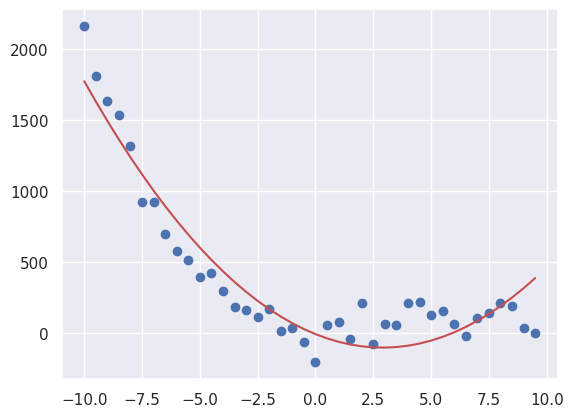

In [34]:
regressor_poly = LinearRegression()
regressor_poly.fit(X_poly, y)

y_pred = regressor_poly.predict(X_poly)

plt.scatter(X, y)
_ = plt.plot(X, y_pred, c='r')

In [35]:
r2_score(y, y_pred)

0.9000601519884677

## Ekstrakcja cech wielomianowych - stopień 3

In [36]:
np.set_printoptions(suppress=True)

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
X_poly

array([[    1.   ,   -10.   ,   100.   , -1000.   ],
       [    1.   ,    -9.5  ,    90.25 ,  -857.375],
       [    1.   ,    -9.   ,    81.   ,  -729.   ],
       [    1.   ,    -8.5  ,    72.25 ,  -614.125],
       [    1.   ,    -8.   ,    64.   ,  -512.   ],
       [    1.   ,    -7.5  ,    56.25 ,  -421.875],
       [    1.   ,    -7.   ,    49.   ,  -343.   ],
       [    1.   ,    -6.5  ,    42.25 ,  -274.625],
       [    1.   ,    -6.   ,    36.   ,  -216.   ],
       [    1.   ,    -5.5  ,    30.25 ,  -166.375],
       [    1.   ,    -5.   ,    25.   ,  -125.   ],
       [    1.   ,    -4.5  ,    20.25 ,   -91.125],
       [    1.   ,    -4.   ,    16.   ,   -64.   ],
       [    1.   ,    -3.5  ,    12.25 ,   -42.875],
       [    1.   ,    -3.   ,     9.   ,   -27.   ],
       [    1.   ,    -2.5  ,     6.25 ,   -15.625],
       [    1.   ,    -2.   ,     4.   ,    -8.   ],
       [    1.   ,    -1.5  ,     2.25 ,    -3.375],
       [    1.   ,    -1.   ,     1.   ,    -1

## Dopasowanie modelu

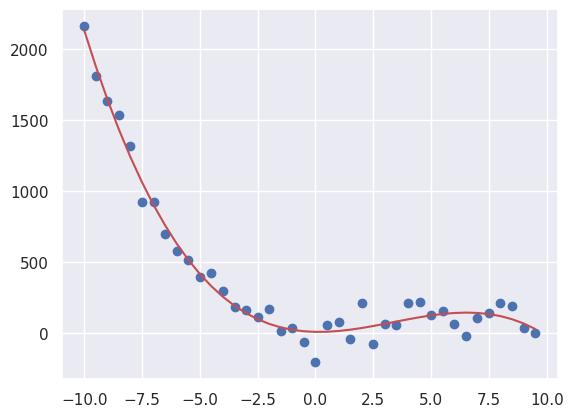

In [37]:
regressor_poly_3 = LinearRegression()
regressor_poly_3.fit(X_poly, y)

y_pred = regressor_poly_3.predict(X_poly)

plt.scatter(X, y)
_ = plt.plot(X, y_pred, c='r')

In [38]:
r2_score(y, y_pred)

0.9793138557357745

# REGRESJA LOGISTYCZNA - Model klasyfikacji

Przykłady zastosowań:
- przewidywanie czy mail jest spamem czy nie
- przewidywanie czy użytkownik kliknie w reklamę
- przewidywanie czy nowotwór jest złośliwy czy nie
- przewidywanie czy dłużnik spłaci wierzycielowu dług czy
  też znajdzie zdarzenie default
- przewidywania czy transakcja jest próbą oszustwa

Przy budowie modelu wykorzystujemy **funkcję sigmoid**

## Import bibliotek

Text(0.5, 1.0, 'Sigmoid Function')

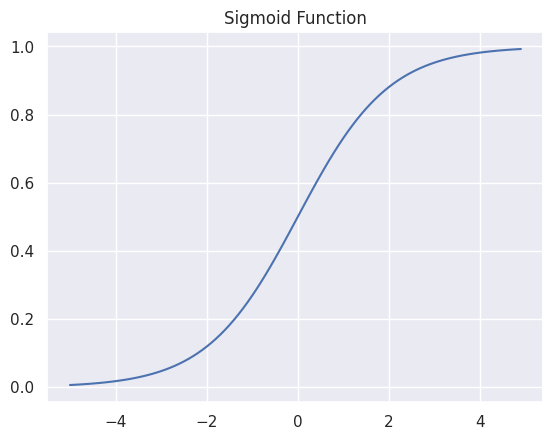

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns

sns.set()
np.random.seed(10) # ustawiamy ziarno losowe abyśmy za każdym razem mieli ten sam wynik
np.set_printoptions(precision=6, suppress=True) # opcje drukowania z precyzją 6 oraz nie były drukowane w notacji wykładniczej

def sigmoid(x):
  return 1 / (1 +np.exp(-x))

X = np.arange(-5, 5, 0.1)
y = sigmoid(X)
plt.plot(X, y)
plt.title('Sigmoid Function')

## Regresja Logistyczna (Logistic Regression) - wprowadzenie

Regresja Logistyczna zwraca nam wartość z przedziału (0,1) co możemy interpretować jako prawdopodobieństwo i na podstawie tych prawdopodobieństw przewidywać poszczególne klasy

## Załadowanie danych

In [4]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
print(data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [10]:
# wyodrębniamy nasze dane oraz zmienna docelową

X = data.data # wszytskie dane
y = data.target # zmienna którą chcemy przewidzieć

print(f'Shape X: {X.shape}')
print(f'Sape y: {y.shape}')

Shape X: (569, 30)
Sape y: (569,)


In [11]:
# Tworzymy obiekt data frame

df = pd.DataFrame(data=X, columns=data.feature_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [12]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## Podział danych na zbiór treningowy i testowy

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (426, 30)
X_test shape: (143, 30)
y_train shape: (426,)
y_test shape: (143,)


## Dopasowanie modelu

In [18]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Predykcja na podstawie modelu

In [19]:
y_prob = classifier.predict_proba(X_test)
y_prob # zmienna zwraca nam prawdopodobieństwo klasy 0 i 1 dla każdej próbki

array([[0.987288, 0.012712],
       [0.000164, 0.999836],
       [0.003309, 0.996691],
       [0.99953 , 0.00047 ],
       [0.006009, 0.993991],
       [0.020227, 0.979773],
       [0.00036 , 0.99964 ],
       [0.917094, 0.082906],
       [0.999998, 0.000002],
       [0.981512, 0.018488],
       [0.000183, 0.999817],
       [0.00061 , 0.99939 ],
       [0.597929, 0.402071],
       [0.001468, 0.998532],
       [0.999204, 0.000796],
       [0.99825 , 0.00175 ],
       [0.001337, 0.998663],
       [0.081787, 0.918213],
       [0.05906 , 0.94094 ],
       [0.996553, 0.003447],
       [0.639339, 0.360661],
       [0.147267, 0.852733],
       [0.006776, 0.993224],
       [0.055969, 0.944031],
       [1.      , 0.      ],
       [1.      , 0.      ],
       [0.086474, 0.913526],
       [1.      , 0.      ],
       [0.002395, 0.997605],
       [0.026593, 0.973407],
       [0.001833, 0.998167],
       [0.016511, 0.983489],
       [1.      , 0.      ],
       [0.001699, 0.998301],
       [0.0274

In [22]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0])

## Ocena modelu

Accuracy: 0.9300699300699301


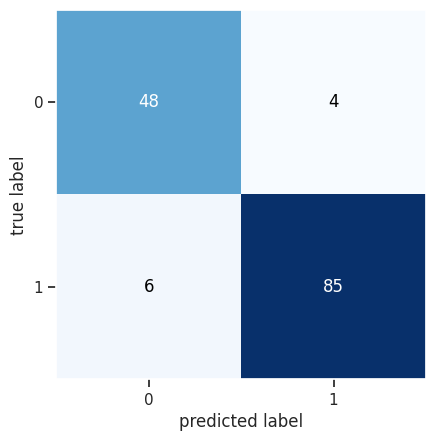

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns
sns.set()

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

In [31]:
def plot_confusion_matrix(cm):
    # Binary classification
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_1', 'true_0'])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index),
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=400, height=400, title=f'Confusion Matrix, Accuracy: {acc:.4f}', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.89      0.92      0.91        52
      benign       0.96      0.93      0.94        91

    accuracy                           0.93       143
   macro avg       0.92      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



# ALGORYTM K-NAJBLIŻSZYCH SĄSIADÓW

## Import bibliotek

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()

## K-nearest Neighbour Algorithm - Algorytm K-najbliższych sąsiadów

Podstawą działania algorytmu jest:

znalezienie z góry określonej liczby próbek treningowych znajdujących się najbliżej naszej obserwacji
przewidzenie na ich podstawie etykiety
Liczba sąsiadów jest określana przez użytkownika. Odległości zwykle kalkuluje sie przy pomocy metryki euklidesowej.

In [35]:
from sklearn.datasets import load_iris
raw_data = load_iris()
raw_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [36]:
raw_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [39]:
# wyświetlamy dane jako obiek data frame
df1 = pd.DataFrame(data=raw_data.data, columns=raw_data.feature_names)
df2 = pd.DataFrame(data=raw_data.target, columns=['class'])
df = pd.concat([df1, df2], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


## Wykres Rozproszenia

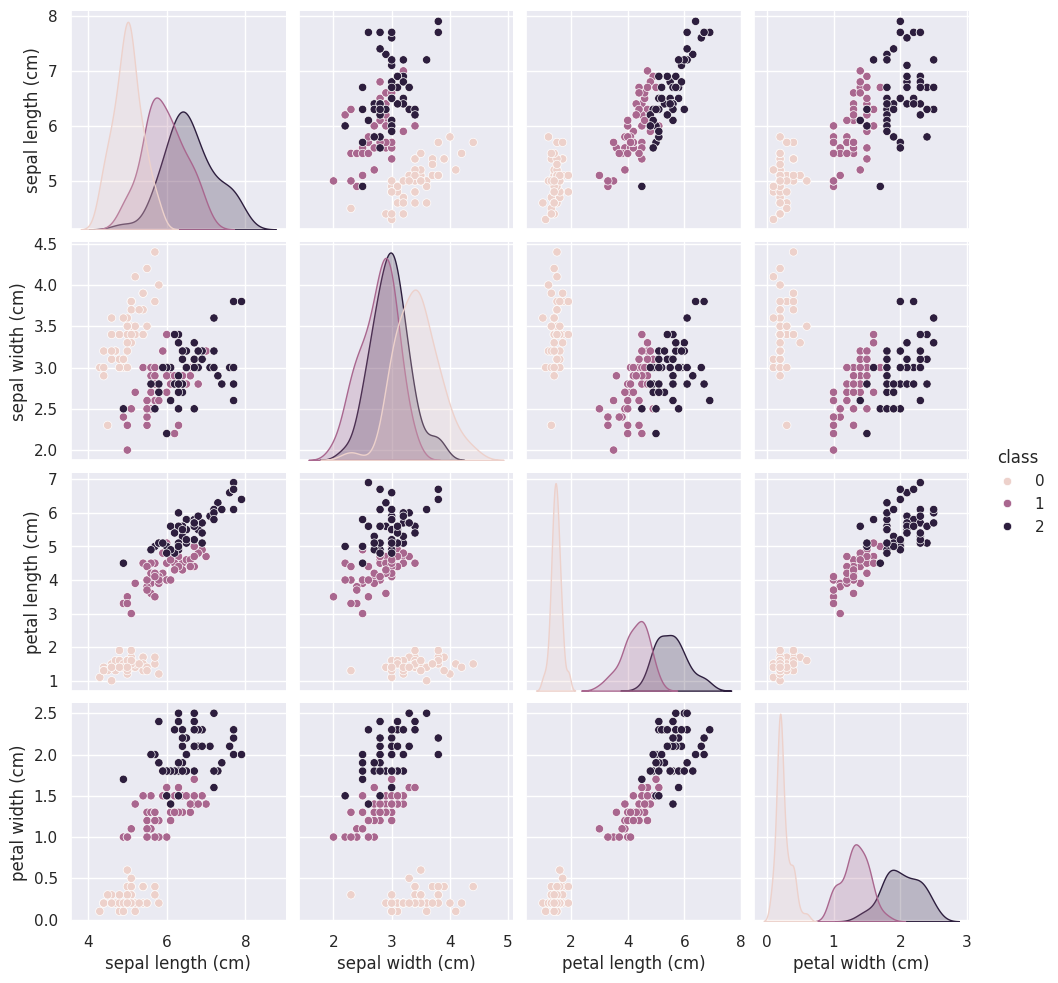

In [42]:
_ = sns.pairplot(df, hue='class')

In [45]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
class,0.782561,-0.426658,0.949035,0.956547,1.000000


In [47]:
X = raw_data.data
y = raw_data.target
X = X[:, :2] # wycinami dwie pierwsze zmienne

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (150, 2)
y shape: (150,)


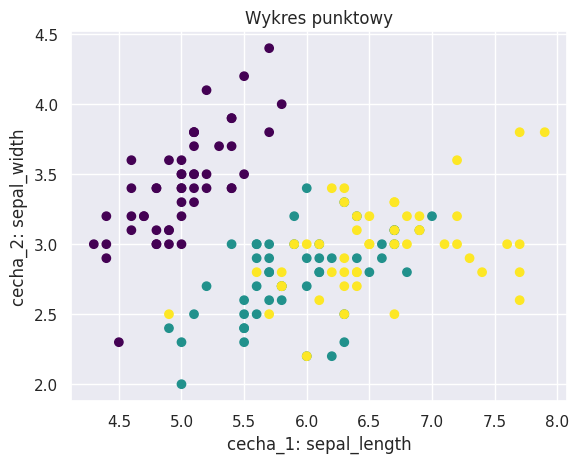

In [48]:
# Niedzielimy tutaj naszych danych po to żeby zobaczyć jak on działa, normalnie powinnismy je podzielić
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Wykres punktowy')
plt.xlabel('cecha_1: sepal_length')
plt.ylabel('cecha_2: sepal_width')
plt.show()

In [49]:
df = pd.DataFrame(X, columns=['sepal_length', 'sepal_width'])
target = pd.DataFrame(y, columns=['class'])
df = pd.concat([df, target], axis=1)
px.scatter(df, x='sepal_length', y='sepal_width', color='class', width=600, height=400)

## K-nearest Neighbors Classifier

In [50]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X, y)

KNeighborsClassifier()

In [51]:
accuracy = classifier.score(X,y)
accuracy

0.84

## Wykres granic decyzyjnych

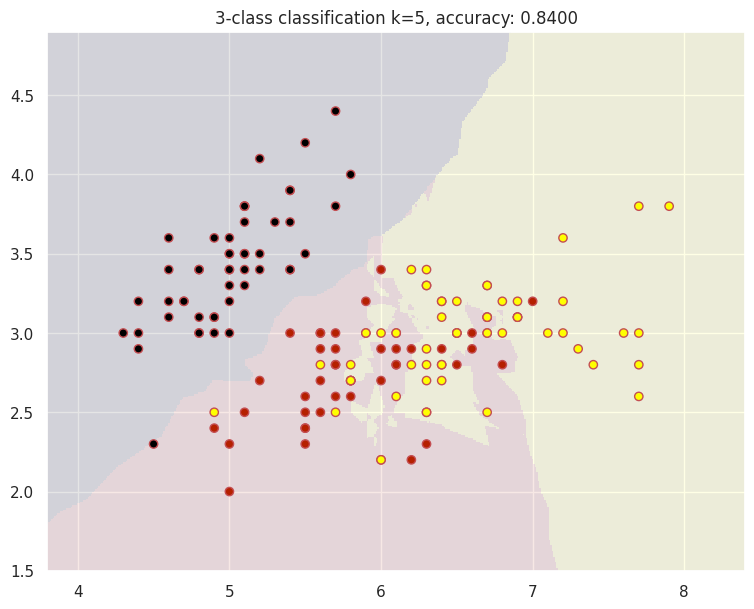

In [52]:
# Przewidzimy dane dla każdego punku naszej siatki

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
mesh = np.c_[xx.ravel(), yy.ravel()]
Z = classifier.predict(mesh)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(9, 7))
plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='gnuplot', edgecolors='r')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f'3-class classification k=5, accuracy: {accuracy:.4f}')
plt.show()

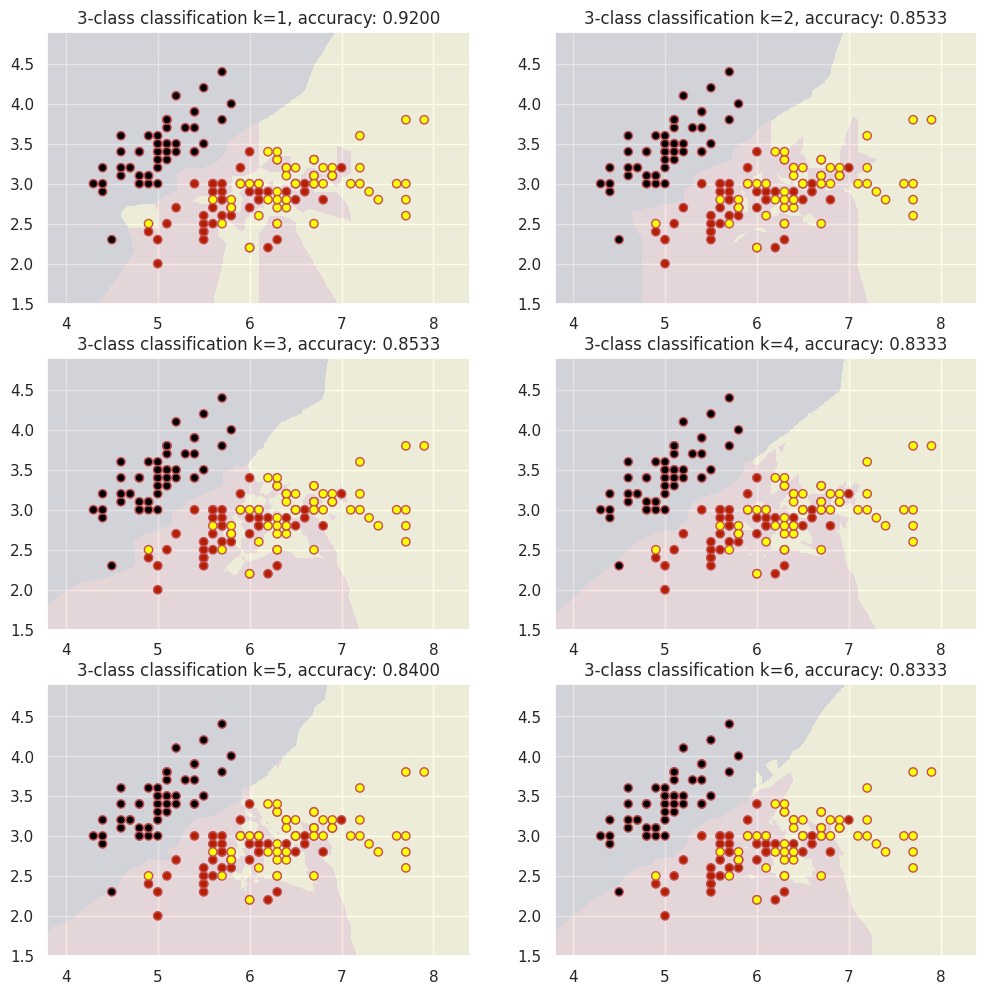

In [53]:
plt.figure(figsize=(12, 12))
for i in range(1, 7):
    plt.subplot(3, 2, i)
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X, y)
    accuracy = classifier.score(X, y)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    mesh = np.c_[xx.ravel(), yy.ravel()]
    Z = classifier.predict(mesh)
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='gnuplot', edgecolors='r')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'3-class classification k={i}, accuracy: {accuracy:.4f}')
plt.show()


## Grid Search

In [56]:
# Aby znależź optymalną liczbę naszych sąsiadów użyjemy metody grid search, polega na pszeszukaniu siatke naszych parametrów
from sklearn.model_selection import GridSearchCV

grid_params = {'n_neighbors' : range(2,30)}

# tworzymy instancję naszego modelu
classifier = KNeighborsClassifier()

gs = GridSearchCV(classifier, grid_params, cv=3) # cross validacja, potrzebujemy jak nasz zbór jest zbyt mały
                                                 # dzieli na 3 części lapie 1 i 2 cześci i na nich trenuje a na 3 cześci sprawdza potem bierze
                                                 # cześć 1 i 3 a srawdza na 2 itd.
gs.fit(X, y)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 30)})

In [57]:
# z tego dowiadujemy sie jaka liczba sąsiadów jest najlepsza dla naszego modelu
gs.best_params_

{'n_neighbors': 6}

In [58]:
k = gs.best_params_['n_neighbors']
k

6

In [59]:
classifier = gs.best_estimator_
classifier

KNeighborsClassifier(n_neighbors=6)

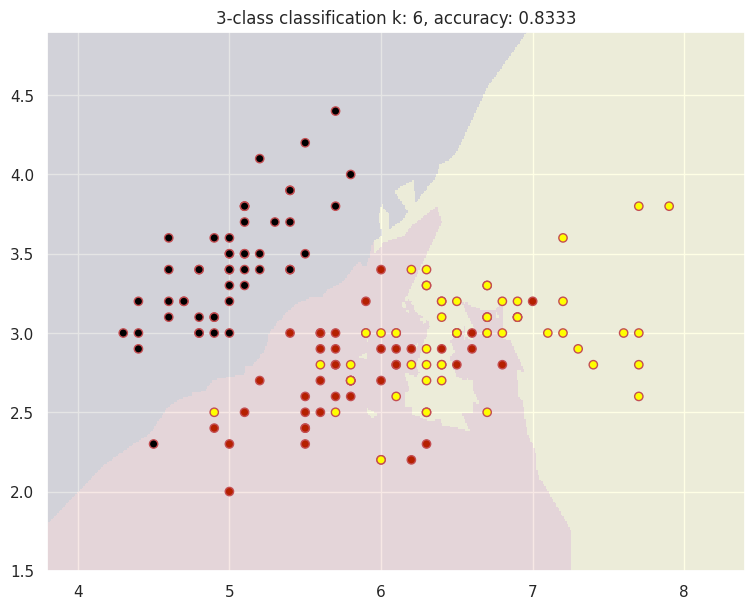

In [60]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
mesh = np.c_[xx.ravel(), yy.ravel()]
Z = gs.predict(mesh)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(9, 7))
plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='gnuplot', edgecolors='r')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f'3-class classification k: {k}, accuracy: {accuracy:.4f}')
plt.show()

# DRZEWO DECYZYJNE

## Import bibliotek

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from IPython.display import Image

sns.set()
np.random.seed(10)

## Załadowanie danych

In [62]:
iris = load_iris()
data = iris.data
targets = iris.target
feature_names = [name.replace(' ', '_')[:-5] for name in iris.feature_names]
class_names = iris.target_names

print(f'Liczba próbek: {len(data)}')
print(f'Kształt danych: {data.shape}')
print(f'Nazwy zmiennych objaśniających: {feature_names}')
print(f'Nazwy kategorii kosaćca: {class_names}')

Liczba próbek: 150
Kształt danych: (150, 4)
Nazwy zmiennych objaśniających: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Nazwy kategorii kosaćca: ['setosa' 'versicolor' 'virginica']


## Eksploracja danych

In [63]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_setosa.jpg', width=200)

In [64]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_versicolor.jpg', width=200)

In [65]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_virginica.jpg', width=200)

In [66]:
data_targets = np.c_[data, targets]
df = pd.DataFrame(data_targets, columns=feature_names + ['class'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [67]:
df.describe().T.apply(lambda x: round(x, 2))

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.84,0.83,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.06,0.44,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.76,1.77,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.20,0.76,0.1,0.3,1.30,1.8,2.5
class,150.0,1.00,0.82,0.0,0.0,1.00,2.0,2.0


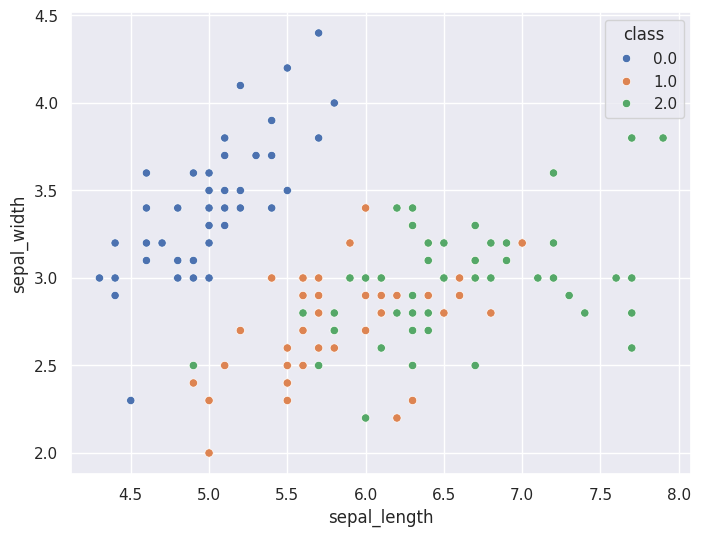

In [70]:
plt.figure(figsize=(8, 6))
_ = sns.scatterplot(x='sepal_length', y='sepal_width', hue='class', data=df, legend='full', palette=sns.color_palette()[:3])

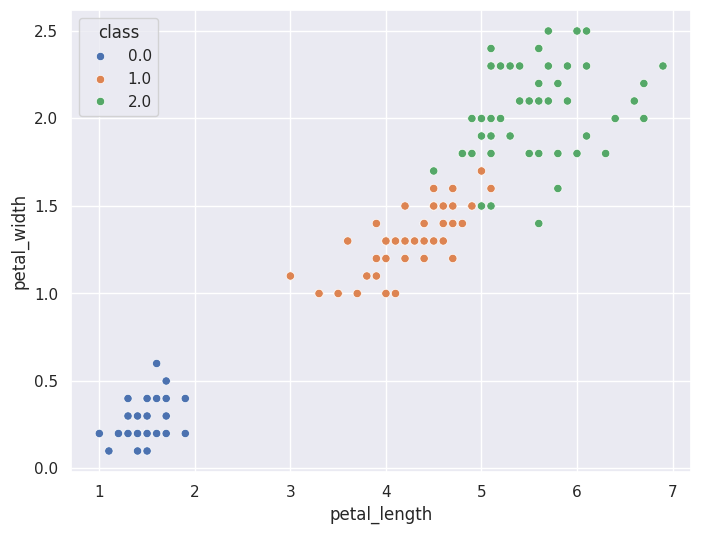

In [71]:
plt.figure(figsize=(8, 6))
_ = sns.scatterplot(x='petal_length', y='petal_width', hue='class', data=df, legend='full', palette=sns.color_palette()[:3])

In [72]:
df['class'].value_counts()

0.0    50
1.0    50
2.0    50
Name: class, dtype: int64

## Przygotowanie danych do modelu

In [73]:
X = df.copy()
X = X[['petal_length', 'petal_width', 'class']]
y = X.pop('class')

In [74]:
X.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [75]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: class, dtype: float64

In [76]:
X = X.values
y = y.values.astype('int16')

## Budowa klasyfikatora drzewa decyzyjnego

In [80]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=1, random_state=30)
classifier.fit(X, y)

DecisionTreeClassifier(max_depth=1, random_state=30)

Wykreślenie granice decyzyjnej

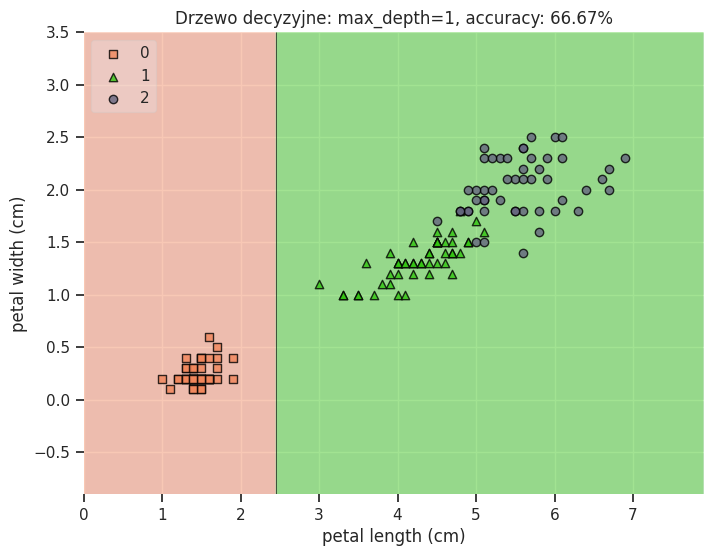

In [81]:
from mlxtend.plotting import plot_decision_regions

colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'

acc = classifier.score(X, y)

plt.figure(figsize=(8, 6))
plot_decision_regions(X, y, classifier, legend=2, colors=colors)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title(f'Drzewo decyzyjne: max_depth=1, accuracy: {acc * 100:.2f}%')
plt.show()

## Graf drzewa decyzyjnego

In [82]:
from sklearn.tree import export_graphviz

export_graphviz(classifier,
               out_file='iris_tree.dot',
               feature_names=iris.feature_names[2:],
               class_names=iris.target_names,
               rounded=True,
               filled=True)

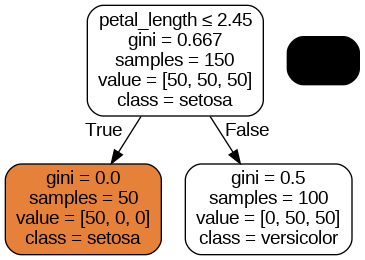

In [84]:
import six
from io import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

dot_data = StringIO()
export_graphviz(classifier,
                out_file=dot_data,
                feature_names=feature_names[2:],
                class_names=class_names,
                special_characters=True,
                rounded=True,
                filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')
Image(graph.create_png(), width=250)

## Budowa funkcji dla modelu drzewa decyzyjnego

In [85]:
def make_decision_tree(max_depth=1):
    # trenowanie modelu
    classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=30)
    classifier.fit(X, y)

    # eksport grafu drzewa
    dot_data = StringIO()
    export_graphviz(classifier,
                   out_file=dot_data,
                   feature_names=feature_names[2:],
                   class_names=class_names,
                   special_characters=True,
                   rounded=True,
                   filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png('graph.png')

    # obliczenie dokładności
    acc = classifier.score(X, y)

    # wykreślenie granic decyzyjnych
    colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'
    plt.figure(figsize=(8, 6))
    ax = plot_decision_regions(X, y, classifier, legend=0, colors=colors)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['setosa', 'versicolor', 'virginica'], framealpha=0.3)
    plt.xlabel('petal length (cm)')
    plt.ylabel('petal width (cm)')
    plt.title(f'Drzewo decyzyjne: max_depth={max_depth}, accuracy={acc * 100:.2f}')

    return Image(graph.create_png(), width=150 + max_depth * 80)

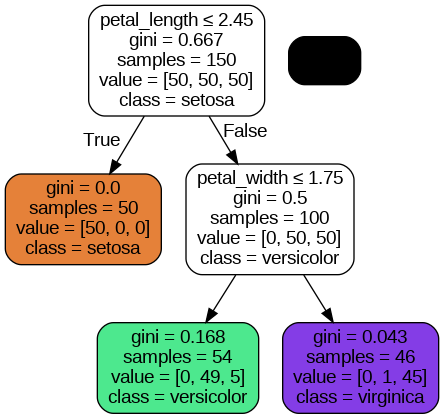

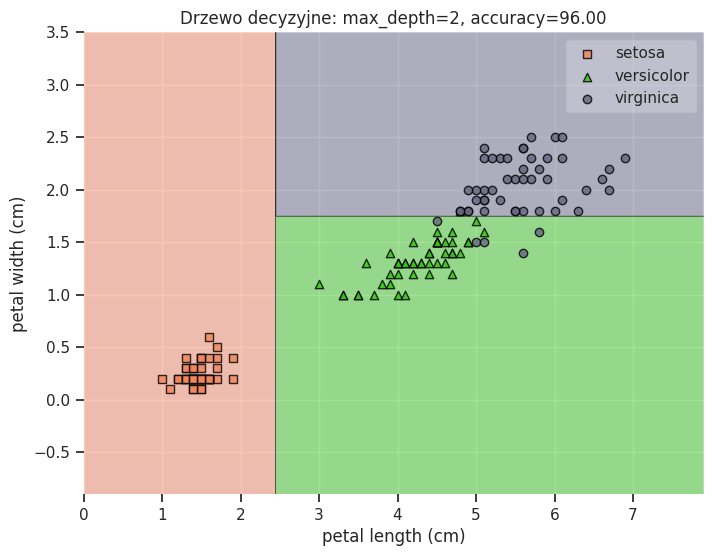

In [86]:
make_decision_tree(max_depth=2)

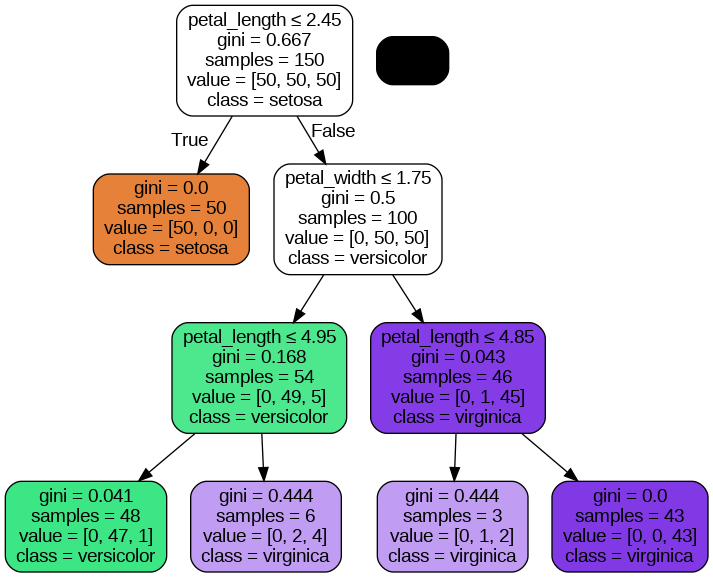

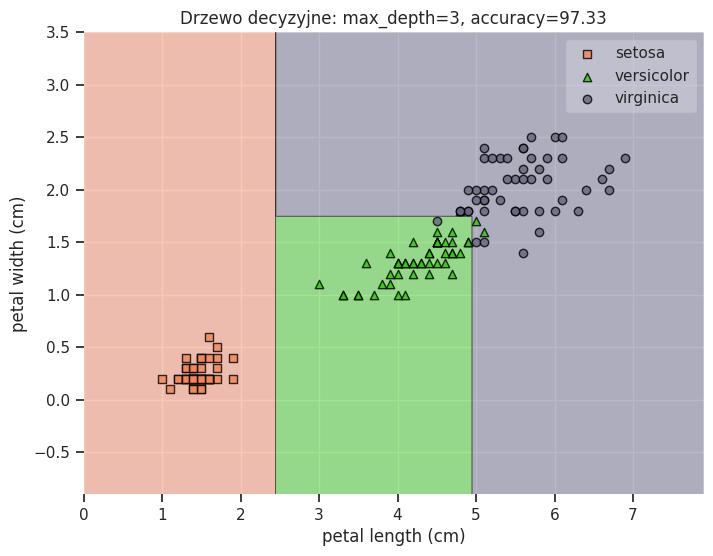

In [87]:
make_decision_tree(max_depth=3)

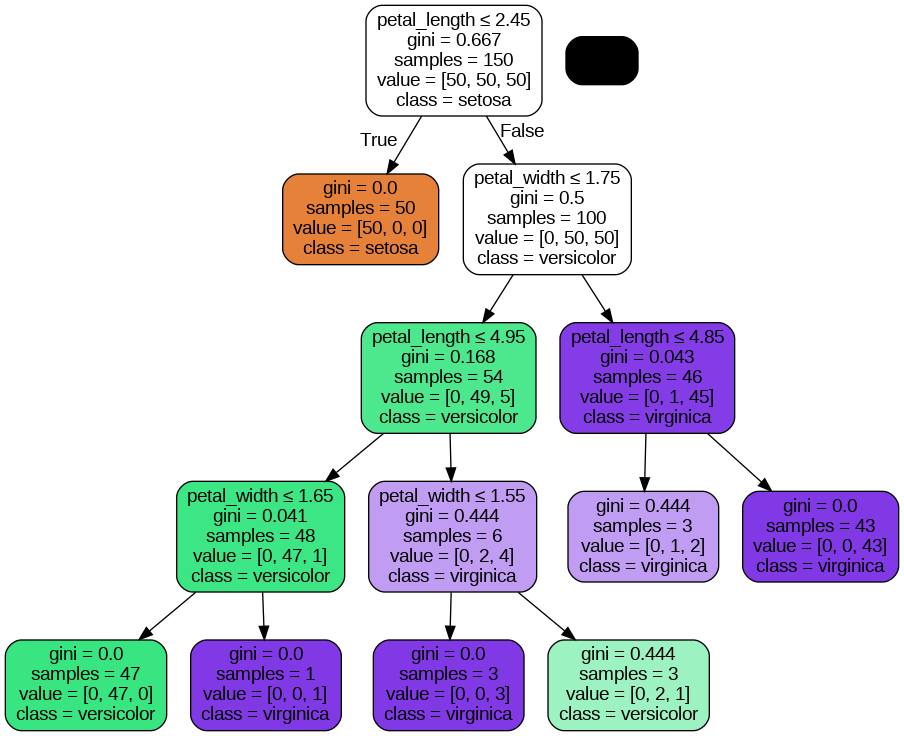

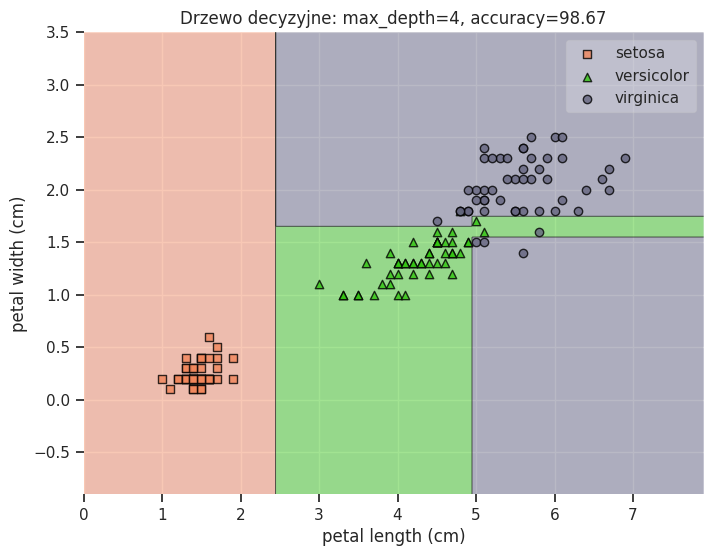

In [88]:
make_decision_tree(max_depth=4)

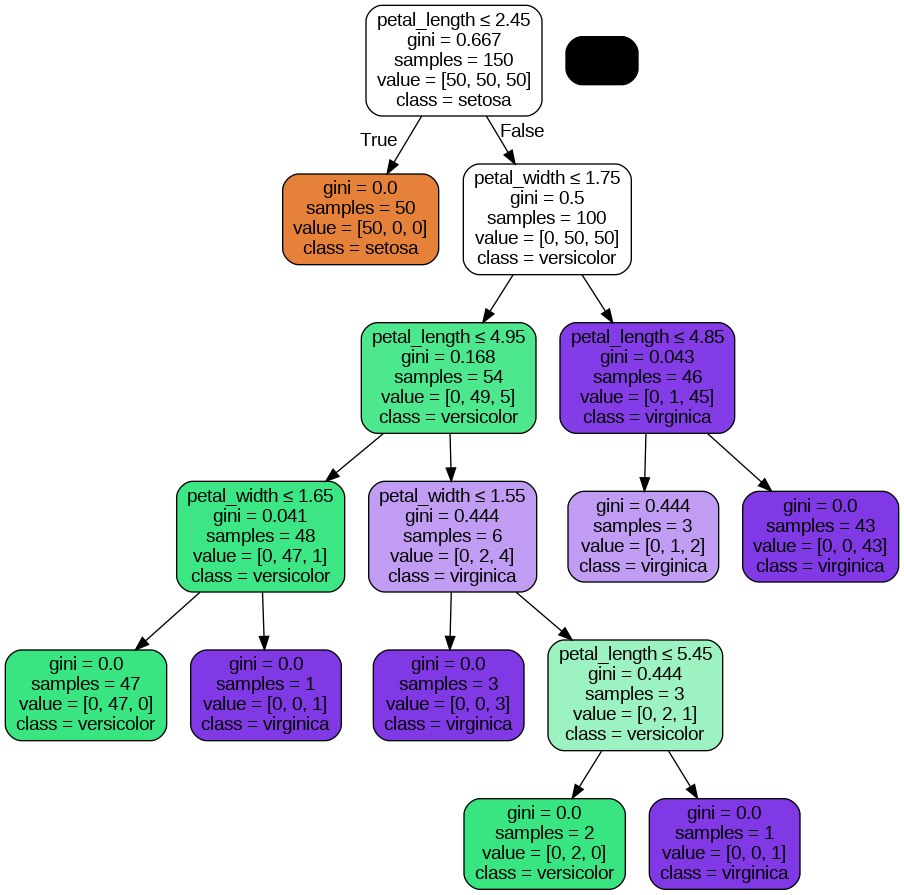

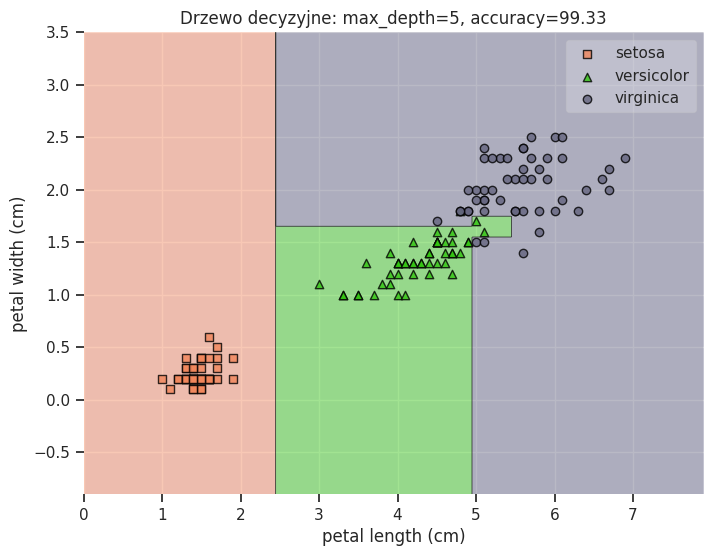

In [89]:
make_decision_tree(max_depth=5)

# SUPPORT VECTOR MACHINE - SVC

Klasyfikacja wieloklasowa

## Import bibliotek

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff

from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
sns.set()

## Wczytanie danych

In [93]:
digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [94]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [95]:
images = digits.images
labels = digits.target
print('images shape:', images.shape)
print('labels shape:', labels.shape)

images shape: (1797, 8, 8)
labels shape: (1797,)


In [96]:
images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

## Wyświetlenie kilku obrazów

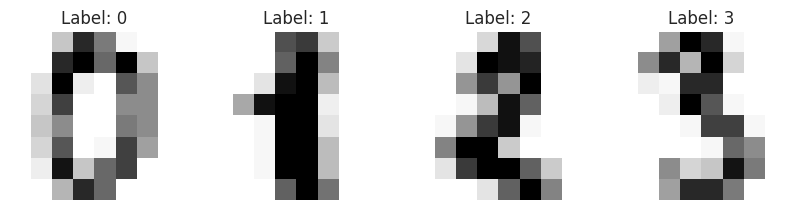

In [97]:
plt.figure(figsize=(10, 10))
for index, (image, label) in enumerate(list(zip(images, labels))[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap='Greys')
    plt.title('Label: {}'.format(index, label))

## Przygotowanie danych do modelu

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print()
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (1347, 8, 8)
X_test shape: (450, 8, 8)
y_train shape: (1347,)
y_test shape: (450,)

X_train shape: (1347, 64)
X_test shape: (450, 64)


In [99]:
X_train[0]

array([ 0.,  0.,  0.,  5., 13., 16.,  8.,  0.,  0.,  0.,  8., 15.,  6.,
        7., 14.,  0.,  0.,  2., 16.,  1.,  1., 11., 10.,  0.,  0.,  4.,
       16., 15., 16., 16.,  6.,  0.,  0.,  0.,  4.,  4.,  5., 15.,  1.,
        0.,  0.,  0.,  0.,  0.,  9.,  8.,  0.,  0.,  0.,  0.,  0.,  2.,
       15.,  1.,  0.,  0.,  0.,  0.,  0.,  6., 10.,  0.,  0.,  0.])

In [100]:
y_train[0]

9

## Trenowanie modelu

In [101]:
from sklearn.svm import SVC

classifier = SVC(gamma=0.001)
classifier.fit(X_train, y_train)

SVC(gamma=0.001)

## Ocena modelu

In [102]:
y_pred = classifier.predict(X_test)
y_pred

array([5, 2, 5, 4, 8, 2, 4, 3, 3, 0, 8, 7, 0, 1, 8, 6, 9, 7, 9, 7, 1, 8,
       6, 7, 8, 8, 5, 2, 5, 9, 3, 3, 7, 3, 4, 1, 9, 2, 5, 4, 2, 1, 0, 9,
       2, 3, 6, 1, 9, 4, 4, 9, 8, 4, 8, 5, 9, 7, 1, 0, 4, 5, 8, 4, 7, 9,
       0, 7, 1, 3, 9, 3, 3, 8, 0, 7, 3, 6, 5, 2, 0, 8, 8, 0, 1, 1, 2, 8,
       8, 8, 2, 6, 3, 4, 7, 9, 8, 2, 9, 2, 5, 0, 8, 0, 4, 8, 8, 0, 6, 7,
       3, 3, 9, 1, 5, 4, 6, 0, 8, 8, 1, 1, 7, 9, 9, 5, 2, 3, 3, 7, 7, 6,
       2, 5, 4, 3, 3, 7, 6, 7, 2, 7, 4, 9, 5, 1, 9, 4, 6, 1, 1, 1, 4, 0,
       8, 9, 1, 2, 3, 5, 0, 3, 4, 1, 5, 4, 9, 3, 5, 6, 4, 0, 8, 6, 7, 0,
       9, 9, 4, 7, 3, 5, 2, 0, 6, 7, 5, 3, 9, 7, 1, 3, 2, 8, 3, 3, 1, 7,
       1, 1, 1, 7, 1, 6, 7, 6, 9, 5, 2, 3, 5, 2, 9, 5, 4, 8, 2, 9, 1, 5,
       0, 2, 3, 9, 0, 2, 0, 2, 1, 0, 5, 0, 6, 4, 2, 1, 9, 0, 9, 0, 6, 9,
       4, 4, 9, 7, 5, 6, 1, 8, 7, 0, 8, 6, 2, 0, 1, 2, 3, 8, 4, 4, 3, 5,
       7, 9, 7, 2, 0, 2, 0, 9, 2, 8, 6, 3, 6, 0, 6, 6, 6, 7, 1, 6, 1, 7,
       6, 0, 6, 3, 7, 4, 6, 2, 8, 0, 8, 4, 7, 3, 3,

In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       0.98      1.00      0.99        44
           2       0.98      1.00      0.99        45
           3       1.00      0.98      0.99        48
           4       1.00      0.97      0.99        40
           5       1.00      1.00      1.00        41
           6       1.00      1.00      1.00        47
           7       0.98      1.00      0.99        47
           8       0.98      0.98      0.98        43
           9       1.00      0.98      0.99        49

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [104]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[46,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 45,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 47,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 41,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 47,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 47,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 42,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 48]])

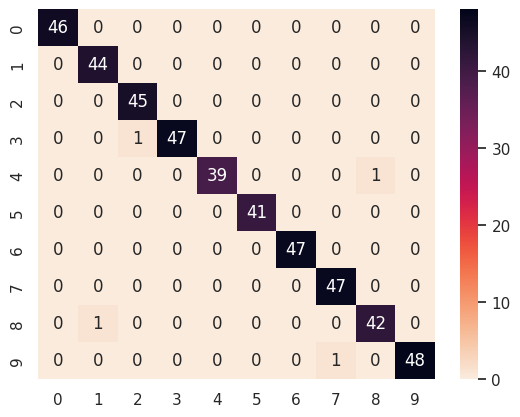

In [105]:
_ = sns.heatmap(cm, annot=True, cmap=sns.cm.rocket_r)

In [106]:
columns = ['pred_' + str(i) for i in range(10)]
index = ['true_' + str(i) for i in range(10)]

def plot_confusion_matrix(cm):
    # Mulitclass classification, 3 classes
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=columns, index=index[::-1])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index),
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=700, height=500, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

## Wyświetlenie błędnych predykcji

In [107]:
results = pd.DataFrame(data={'y_pred': y_pred, 'y_test': y_test})
results.head(10)

,y_pred,y_test
0,5,5
1,2,2
2,5,5
3,4,4
4,8,8
5,2,2
6,4,4
7,3,3
8,3,3
9,0,0


In [108]:
errors = results[results['y_pred'] != results['y_test']]
errors_idxs = list(errors.index)
errors_idxs

[27, 58, 129, 154]

In [109]:
results.loc[errors_idxs, :]

,y_pred,y_test
27,2,3
58,1,8
129,7,9
154,8,4


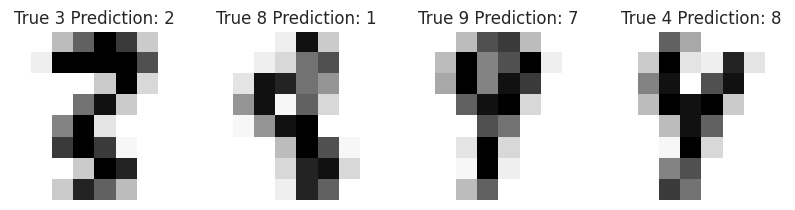

In [110]:
plt.figure(figsize=(10, 10))
for idx, error_idx in enumerate(errors_idxs[:4]):
    image = X_test[error_idx].reshape(8, 8)
    plt.subplot(2, 4, idx + 1)
    plt.axis('off')
    plt.imshow(image, cmap='Greys')
    plt.title(f"True {results.loc[error_idx, 'y_test']} Prediction: {results.loc[error_idx, 'y_pred']}")